# EDA on the Open Food Facts dataset

The notebook analyses the dataset with by focussing on the task on extracting nutrition information using images.

As the size of the dataset is large and therefore unable to into memory of my laptop, we will random select rows from the entire dataset.
* Count the total number of rows in the dataseet.
* I have chosen 5000 to be the sample size.
* The dataset is read in chunks of 10,000 rows.
* nb_chunks = total_rows// chunk_size + 1
* nb_samples_per_chunk = nb_samples // nb_chunks + 1

For reproducibility, I set the seed of the numpy random generator

In [1]:
import pandas as pd
import numpy as np
import gzip
import chardet
from tqdm import tqdm

# File path
FILEPATH = '../data/food.csv'  # Ensure it's correctly named
SAMPLE_SIZE = 5000
CHUNK_SIZE = 10000
SEED = 42

In [2]:

# Detect file encoding first (for safety)
with gzip.open(FILEPATH, 'rb') as f:
    rawdata = f.read(10000)  # Read a small portion to detect encoding
    detected_encoding = chardet.detect(rawdata)['encoding']

print(f"Detected Encoding: {detected_encoding}")

# Count total rows efficiently
with gzip.open(FILEPATH, 'rt', encoding=detected_encoding, errors='replace') as f:
    total_rows = sum(1 for _ in f) - 1  # Subtract header

print(f"Total rows: {total_rows}")

Detected Encoding: utf-8
Total rows: 3649876


In [4]:
# fix the seed
np.random.seed(SEED)

nb_chunks = total_rows // CHUNK_SIZE + 1
nb_samples_per_chunk = SAMPLE_SIZE // nb_chunks + 1

print(f"Number of chunks: {nb_chunks}")
print(f"Samples per chunk: {nb_samples_per_chunk}")

df_sample = pd.DataFrame()
df_iter = pd.read_csv(FILEPATH, compression="gzip", encoding=detected_encoding, sep='\t', 
                      chunksize=CHUNK_SIZE, on_bad_lines='skip', low_memory=False)

for _ in tqdm(range(nb_chunks), desc="Sampling dataset"):
    df = next(df_iter)

    if len(df) < nb_samples_per_chunk:
        break

    random_rows = np.random.choice(df.index, size=nb_samples_per_chunk, replace=False)
    df_sample = pd.concat([df_sample, df.iloc[random_rows - df.index.start]])

    if len(df_sample) >= SAMPLE_SIZE:
        break

# Display sampled dataset info
print(f"Sampled dataset shape: {df_sample.shape}")
df_sample.head()


Number of chunks: 365
Samples per chunk: 14


Sampling dataset:  98%|█████████▊| 357/365 [01:30<00:02,  3.94it/s]

Sampled dataset shape: (5012, 206)


code                                                url  \
6252  935798254  http://world-en.openfoodfacts.org/product/0000...   
4684       5750  http://world-en.openfoodfacts.org/product/0000...   
1731       1504  http://world-en.openfoodfacts.org/product/0000...   
4742  595324659  http://world-en.openfoodfacts.org/product/0000...   
4521  539003206  http://world-en.openfoodfacts.org/product/0000...   

              creator   created_t      created_datetime  last_modified_t  \
6252          kiliweb  1663143396  2022-09-14T08:16:36Z       1728059127   
4684       prepperapp  1712599606  2024-04-08T18:06:46Z       1728053745   
1731           fabe56  1576967017  2019-12-21T22:23:37Z       1728035066   
4742        foodvisor  1711888055  2024-03-31T12:27:35Z       1711888056   
4521  usda-ndb-import  1489075308  2017-03-09T16:01:48Z       1587587513   

     last_modified_datetime   last_modified_by  last_updated_t  \
6252   2024-10-04T16:25:27Z       fix-code-bot    1.737535e+09   
4684   2024-10-04T14:55:45Z       fix-code-bot    1.737485e+09   
1731   2024-10-04T09:44:26Z       fix-code-bot    1.728035e+09   
4742   2024-03-31T12:27:36Z          foodvisor    1.711888e+09   
4521   2020-04-22T20:31:53Z  org-database-usda    1.734802e+09   

     last_updated_datetime  ... glycemic-index_100g water-hardness_100g  \
6252  2025-01-22T08:43:35Z  ...                 NaN                 NaN   
4684  2025-01-21T18:39:28Z  ...                 NaN                 NaN   
1731  2024-10-04T09:44:26Z  ...                 NaN                 NaN   
4742  2024-03-31T12:27:36Z  ...                 NaN                 NaN   
4521  2024-12-21T17:26:55Z  ...                 NaN                 NaN   

     choline_100g phylloquinone_100g beta-glucan_100g inositol_100g  \
6252          NaN                NaN              NaN           NaN   
4684          NaN                NaN              NaN           NaN   
1731          NaN                NaN              NaN           NaN   
4742          NaN                NaN              NaN           NaN   
4521          NaN                NaN              NaN           NaN   

     carnitine_100g sulphate_100g nitrate_100g acidity_100g  
6252            NaN           NaN          NaN          NaN  
4684            NaN           NaN          NaN          NaN  
1731            NaN           NaN          NaN          NaN  
4742            NaN           NaN          NaN          NaN  
4521            NaN           NaN          NaN          NaN  

[5 rows x 206 columns]

## Columns

We will now look into the different columns present in the dataset

In [5]:
columns = df_sample.columns

print(f"Number of columns: {len(columns)}")
for col in sorted(columns):
    print(col)

Number of columns: 206
abbreviated_product_name
acidity_100g
added-salt_100g
added-sugars_100g
additives
additives_en
additives_n
additives_tags
alcohol_100g
allergens
allergens_en
alpha-linolenic-acid_100g
arachidic-acid_100g
arachidonic-acid_100g
behenic-acid_100g
beta-carotene_100g
beta-glucan_100g
bicarbonate_100g
biotin_100g
brand_owner
brands
brands_tags
butyric-acid_100g
caffeine_100g
calcium_100g
capric-acid_100g
caproic-acid_100g
caprylic-acid_100g
carbohydrates_100g
carbon-footprint-from-meat-or-fish_100g
carbon-footprint_100g
carnitine_100g
casein_100g
categories
categories_en
categories_tags
cerotic-acid_100g
chloride_100g
chlorophyl_100g
cholesterol_100g
choline_100g
chromium_100g
cities
cities_tags
cocoa_100g
code
collagen-meat-protein-ratio_100g
completeness
copper_100g
countries
countries_en
countries_tags
created_datetime
created_t
creator
data_quality_errors_tags
dihomo-gamma-linolenic-acid_100g
docosahexaenoic-acid_100g
eicosapentaenoic-acid_100g
elaidic-acid_100g
em

In [28]:
from enum import Enum

# Define an Enum for columns
class DatasetColumns(Enum):
    """Enum for dataset columns to avoid using string literals."""
    __slots__ = ()  # Prevent instance attributes for efficiency

    # Dynamically create attributes for each column
    @classmethod
    def create(cls):
        return {col.upper(): col for col in columns}  # Convert to uppercase for consistency
    
ds_cols = Enum('DatasetColumns', DatasetColumns.create())


## Missing Values

We will now take a look into the missing values that are present in the dataset.

In [13]:

# Checking for missing values
missing_values = df_sample.isnull().sum().sort_values(ascending=False)

missing = missing_values[missing_values > 0]
no_missing = missing_values[missing_values == 0]
all_missing = missing_values[missing_values == len(df_sample)]

print(f"Number of columns with no missing values:{len(no_missing)}")
print(no_missing.keys().to_list())

print(f"Number of columns with all missing values: {len(all_missing)}")
print(all_missing.keys().to_list()) 

print(f"Number of columns with missing values: {len(missing)}")


Number of columns with no missing values:10
['states_tags', 'states', 'last_modified_t', 'created_datetime', 'states_en', 'creator', 'url', 'code', 'created_t', 'last_modified_datetime']
Number of columns with all missing values: 55
['cities', 'allergens_en', 'additives', 'palmitic-acid_100g', 'stearic-acid_100g', 'arachidic-acid_100g', 'behenic-acid_100g', 'lignoceric-acid_100g', 'montanic-acid_100g', 'melissic-acid_100g', 'omega-9-fat_100g', 'unsaturated-fat_100g', 'butyric-acid_100g', 'energy-from-fat_100g', 'insoluble-fiber_100g', 'linoleic-acid_100g', 'mead-acid_100g', 'arachidonic-acid_100g', 'elaidic-acid_100g', 'oleic-acid_100g', 'dihomo-gamma-linolenic-acid_100g', 'gondoic-acid_100g', 'erucic-acid_100g', 'nervonic-acid_100g', 'fructose_100g', 'erythritol_100g', 'added-salt_100g', 'casein_100g', 'serum-proteins_100g', 'nucleotides_100g', 'chlorophyl_100g', 'inositol_100g', 'glycemic-index_100g', 'water-hardness_100g', 'beta-glucan_100g', 'beta-carotene_100g', 'silica_100g', 'ch

## Drop columns with all missing values

Though the this is based on small subset of the dataset, we will drop columns that have all missing values. Ideally, it should be better to try of a largest subset to draw better conclusions.

In [23]:
filtered_cols = set(columns) - set(all_missing.keys().to_list())

df_sample = df_sample[list(filtered_cols)]

print(f"Number of columns after removing all missing values: {len(df_sample.columns)}")

Number of columns after removing all missing values: 151


## IMAGE NUTRITION (RELEVANT DATA)
Since we are interested in extracting the nutrition information from product images, we will first look at the `image_nutrition_url`. Drop the rows that have nan values.

In [30]:
print(f"Number of missing values for {ds_cols.IMAGE_NUTRITION_URL.value}: {missing_values[ds_cols.IMAGE_NUTRITION_URL.value]}")
df_sample = df_sample.dropna(subset=[ds_cols.IMAGE_NUTRITION_URL.value])
nutr_urls= df_sample.image_nutrition_url.to_list()
nutr_urls[:10]

Number of missing values for image_nutrition_url: 2368


['https://images.openfoodfacts.org/images/products/000/093/579/8254/nutrition_it.5.400.jpg',
 'https://images.openfoodfacts.org/images/products/000/094/411/2453/nutrition_it.5.400.jpg',
 'https://images.openfoodfacts.org/images/products/000/068/480/0071/nutrition_fr.5.400.jpg',
 'https://images.openfoodfacts.org/images/products/000/000/000/0501/nutrition_en.6.400.jpg',
 'https://images.openfoodfacts.org/images/products/000/100/211/2784/nutrition_fr.10.400.jpg',
 'https://images.openfoodfacts.org/images/products/000/429/057/7593/nutrition_en.5.400.jpg',
 'https://images.openfoodfacts.org/images/products/000/201/595/0045/nutrition_en.5.400.jpg',
 'https://images.openfoodfacts.org/images/products/000/534/231/3189/nutrition_en.5.400.jpg',
 'https://images.openfoodfacts.org/images/products/000/000/006/2237/nutrition_en.18.400.jpg',
 'https://images.openfoodfacts.org/images/products/000/000/010/4975/nutrition_en.15.400.jpg']

### Analysing different languages
We observe that they are in different languages. For example the filename `nutrition_fr..jpg` is in French, `nutrition_en..jpg` is in English and so on. Let's plot a histogram on the different languages present in the nutrition label.

Skipping URL https://images.openfoodfacts.org/images/products/541/040/101/3014/nutrition.8.400.jpg


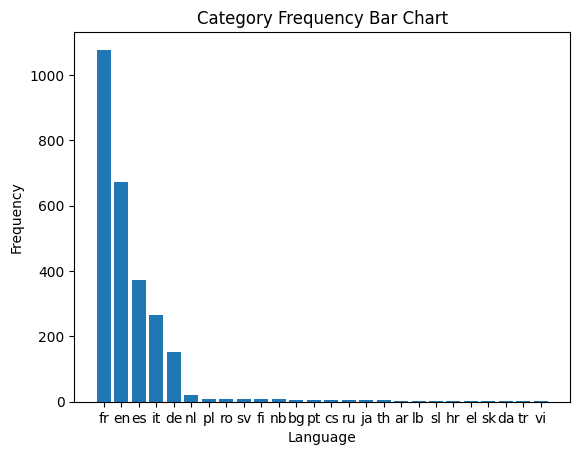

In [32]:
languages = []

for url in nutr_urls:
    try:
        lang = url.split('/')[-1].split('.')[0].split('_')[1] 
        languages.append(lang)
    except:
        print(f"Skipping URL {url}")


## Language Distribution in Nutrition Image URLs

- We analyze the distribution of languages in nutrition image URLs.
- This helps us understand whether certain languages dominate the dataset.

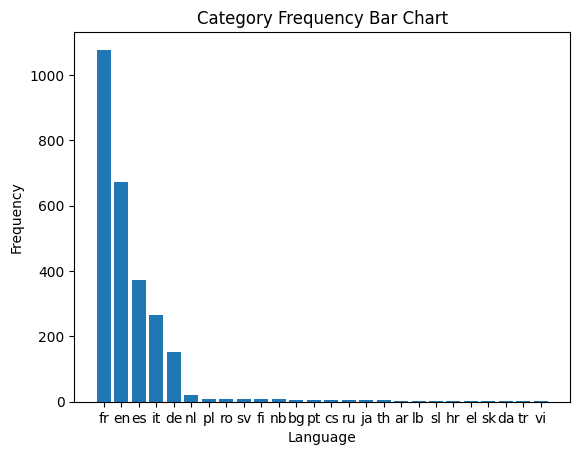

In [34]:
# histogram of languages
import matplotlib.pyplot as plt
from collections import Counter

%matplotlib inline
# Count occurrences of each language
language_counts = Counter(languages)

sorted_languages = sorted(language_counts.items(), key=lambda x: x[1], reverse=True)
langs, counts = zip(*sorted_languages)

# Plot bar chart
plt.bar(langs, counts)

# Labels and title
plt.xlabel('Language')
plt.ylabel('Frequency')
plt.title('Category Frequency Bar Chart')

# Show plot
plt.show()

For this particular subset  of the dataset, we observe that main languages are French, English, Spanish and Italian. Ideally, we should to look bigger chunks to check if this observation holds. For limit the scope of this exercise we focus of the nutrition images that are in English.

Now let's look into the actual images to check the quality. 

In [33]:
en_image_urls = [url for url, lang in zip(nutr_urls, languages) if lang == 'en']

df_sample = df_sample[df_sample[ds_cols.IMAGE_NUTRITION_URL.value].isin(en_image_urls)]

print(f"Number of rows after filtering by language: {len(df_sample)}")

Number of rows after filtering by language: 673


## Looking in to the quality of the images

In [ ]:
import shutil
import matplotlib.pyplot as plt
from PIL import Image
import wget
from pathlib import Path

def plot_images(urls:list[str], labels:list[str]=None):
    images = []
    DOWNLOAD_PATH = Path('../data/images/')
    if DOWNLOAD_PATH.exists():
        # systematically delete
        shutil.rmtree(DOWNLOAD_PATH)
    DOWNLOAD_PATH.mkdir(exist_ok=True)

    for url in tqdm(urls):
        try:
            image = Image.open(wget.download(url, out=str(DOWNLOAD_PATH)))
            images.append(image)
        except:
            print(f"Error Downloading ... Skipping URL {url}")

    # Display images
    fig, axes = plt.subplots(len(urls)//5 , 5, figsize=(20, 10))
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i])
        if labels is not None:
            ax.set_title(labels[i])
        ax.axis('off')
    plt.show()

100%|██████████| 10/10 [09:50<00:00, 59.04s/it]


IndexError: list index out of range

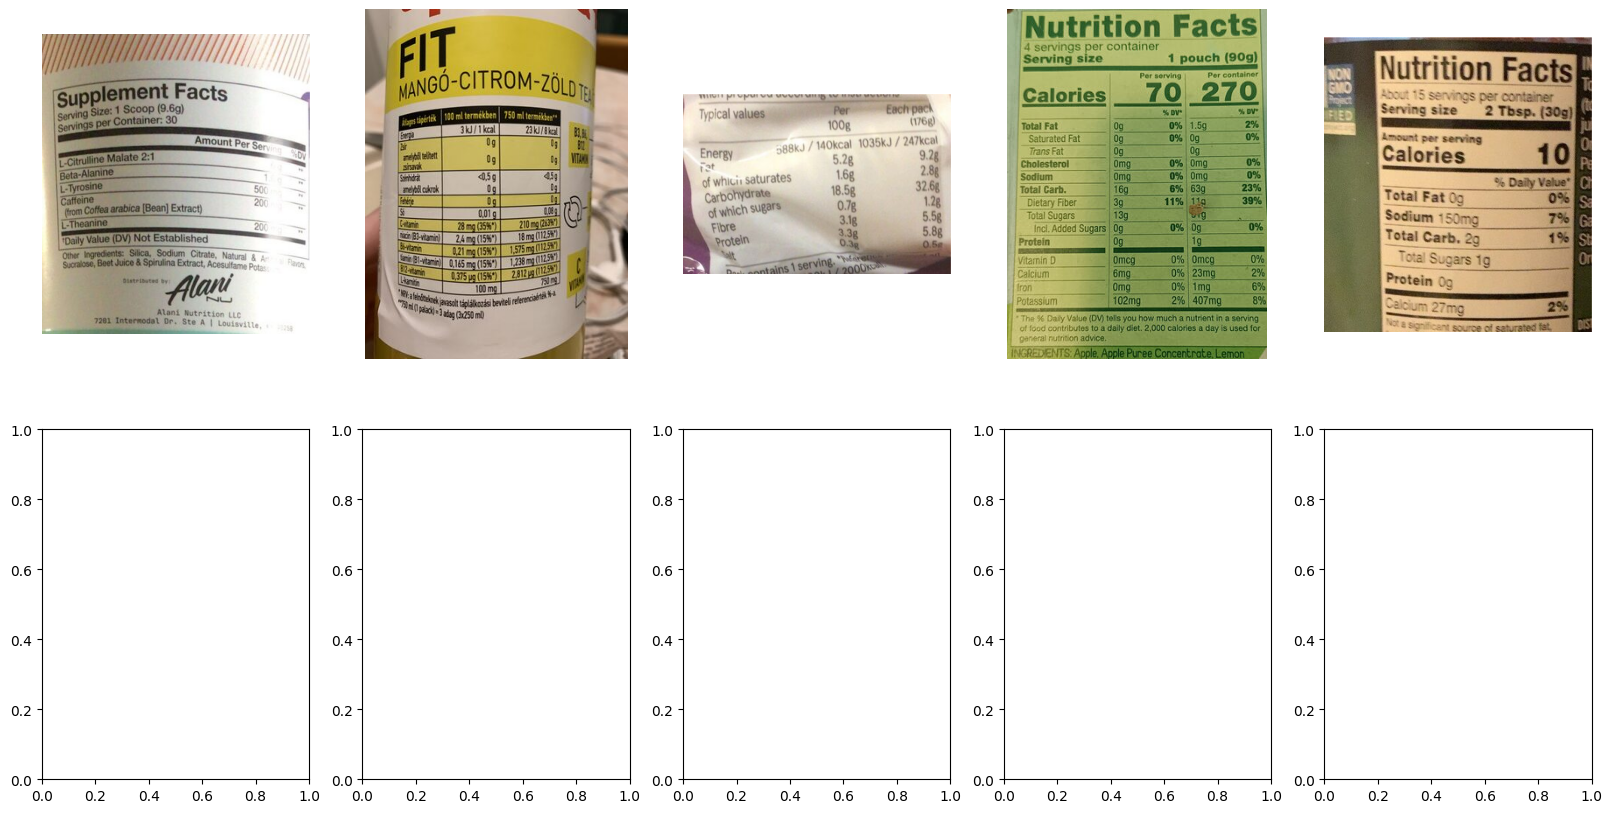

In [36]:

plot_images(df_sample[ds_cols.IMAGE_NUTRITION_URL.value].sample(10).to_list())


The images of different orientations, resolution and quality. Some of the images have quantities given an serving size instead of 100g since the ground-truth mentions the values per 100g. For this let's look at serving_size and serving_quantity columns.

In [38]:
print(f"Number of missing values for serving_size: {missing_values[ds_cols.SERVING_SIZE.value]}")
print(f"Number of missing values for serving_size_unit: {missing_values[ds_cols.SERVING_QUANTITY.value]}")

df_sample = df_sample.dropna(subset=[ds_cols.SERVING_SIZE.value, ds_cols.SERVING_QUANTITY.value])
print(f"Number of rows after removing missing values in serving size and quantity: {len(df_sample)}")

Number of missing values for serving_size: 3728
Number of missing values for serving_size_unit: 3748
Number of rows after removing missing values in serving size and quantity: 193


## Further cleaning
1. The column data_quality_errors_tags has bunch of number of tag to signifiy a erros in the nutrition value. We can ignore those rows with have these tags.

In [39]:
# Remove rows with data quality errors
df_sample = df_sample[df_sample.data_quality_errors_tags.isna()]
print(f"Number of rows after removing data quality errors: {len(df_sample)}")

Number of rows after removing data quality errors: 182


## Other Relevant information
To improve of help the perhaps predict the nutrition content of cases the OCR does not accurately detect or completely miss the certain nutrient values, we can may be leverage the `nutriscore`, `nova_group`, `pnns_groups_1`, `pnns_groups_2` to help predict these missing values. I use ydata_profiling to al

In [42]:
from ydata_profiling import ProfileReport

other_relevant = [ds_cols.NUTRISCORE_GRADE.value,
                  ds_cols.NUTRISCORE_GRADE.value, 
                  ds_cols.NOVA_GROUP.value, 
                  ds_cols.PNNS_GROUPS_1.value, 
                  ds_cols.PNNS_GROUPS_2.value,
                  ds_cols.MAIN_CATEGORY_EN.value]
df_other_relevant = df_sample[other_relevant]

profile = ProfileReport(df_other_relevant, title="Other Relevant Columns Profiling Report", minimal=True)
profile

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  5.97it/s]


## Nutrition Data Profiling

- We generate a **lightweight profiling report** to explore nutritional values.

In [45]:
# Finally looking at the nutrition columns
nutri_columns = [col for col in columns if '_100g' in col and col not in all_missing.keys()]

df_nutri_columns = df_sample[nutri_columns]
profile = ProfileReport(df_nutri_columns, title="Nutrition Report", minimal=True)
profile


Render HTML: 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]
